In [26]:
pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---- ----------------------------------- 0.2/2.1 MB 6.7 MB/s eta 0:00:01
     ------------- -------------------------- 0.7/2.1 MB 8.7 MB/s eta 0:00:01
     ------------------- -------------------- 1.0/2.1 MB 8.2 MB/s eta 0:00:01
     ------------------------ --------------- 1.3/2.1 MB 8.2 MB/s eta 0:00:01
     ----------------------------------- ---- 1.9/2.1 MB 8.5 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\jbhav\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [99]:
!pip install --upgrade jupyter ipywidgets

In [131]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install --upgrade jupyter ipywidgets
!pip install fuzzy-c-means


In [101]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


In [102]:
# Load the dataset

diabetes_data = pd.read_csv(r"C:\Users\jbhav\Desktop\Pace University\Algo for Data Science\Final Project\diabetes.csv")


In [103]:
#Lets read the data

print(diabetes_data.info())
print(diabetes_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

In [104]:
#Print columns of data
print(diabetes_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [105]:
print(diabetes_data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Distribution Analysis

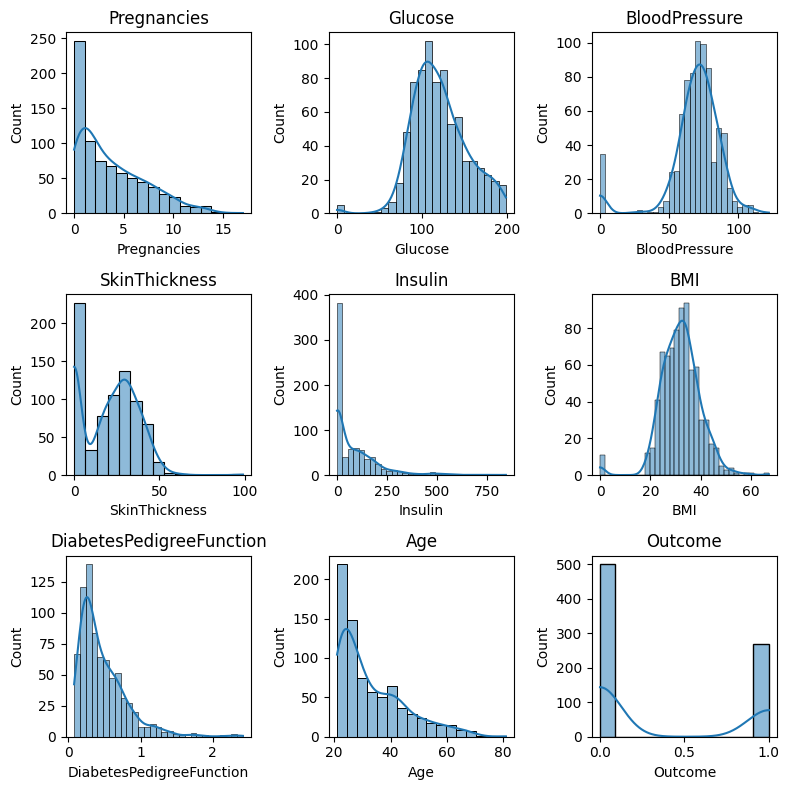

In [106]:
# Histograms for each feature
plt.figure(figsize=(8, 8))
for i, col in enumerate(diabetes_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(diabetes_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


Missing Values and Zeros Analysis

In [107]:
# Checking for missing values
print("Null Values:")
print(diabetes_data.isnull().sum())

# Count zeros in key columns like Glucose, BloodPressure, etc.
key_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in key_columns:
    zeros = (diabetes_data[col] == 0).sum()
    print(f"Number of zeros in {col}: {zeros}")


Null Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of zeros in Glucose: 5
Number of zeros in BloodPressure: 35
Number of zeros in SkinThickness: 227
Number of zeros in Insulin: 374
Number of zeros in BMI: 11


Outlier Detection

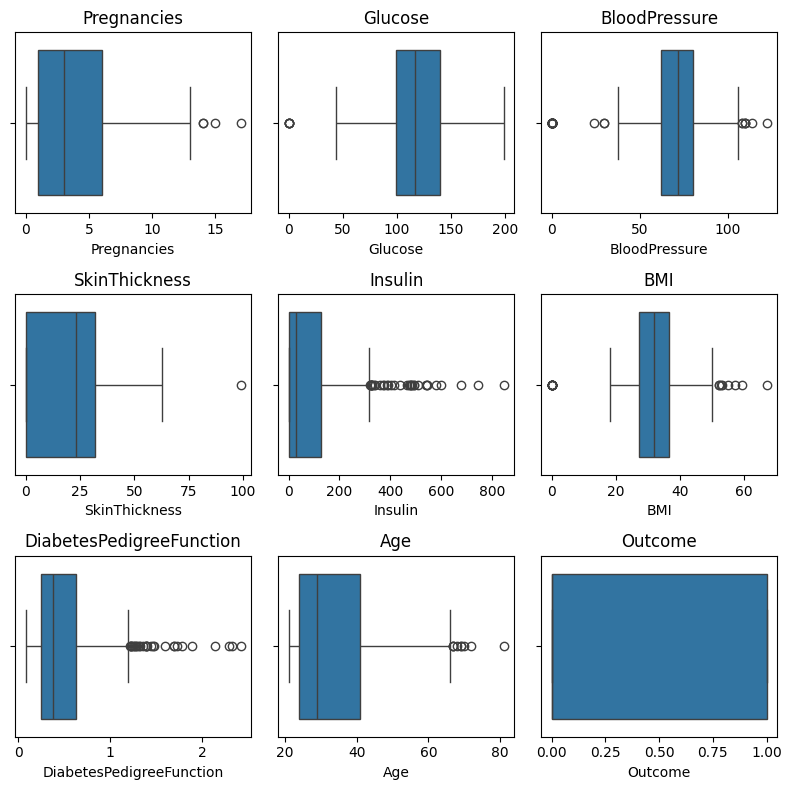

In [108]:
# Boxplots for each feature
plt.figure(figsize=(8,8))
for i, col in enumerate(diabetes_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=diabetes_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [109]:
#Treating Outliers

for col in diabetes_data.columns[:-1]:  # Excluding 'Outcome' column
    lower_threshold = diabetes_data[col].quantile(0.01)
    upper_threshold = diabetes_data[col].quantile(0.99)
    diabetes_data[col] = np.clip(diabetes_data[col], lower_threshold, upper_threshold)

# After this task, all the values in each column will be within the 1st and 99th percentile range.


In [110]:
from scipy.stats.mstats import winsorize

for col in key_columns:
    diabetes_data[col] = winsorize(diabetes_data[col], limits=[0.05, 0.05])


Exception ignored in: <function tqdm.__del__ at 0x000001F13D84CF70>
Traceback (most recent call last):
  File "C:\Users\jbhav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "C:\Users\jbhav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000001F13D84CF70>
Traceback (most recent call last):
  File "C:\Users\jbhav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "C:\Users\jbhav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra

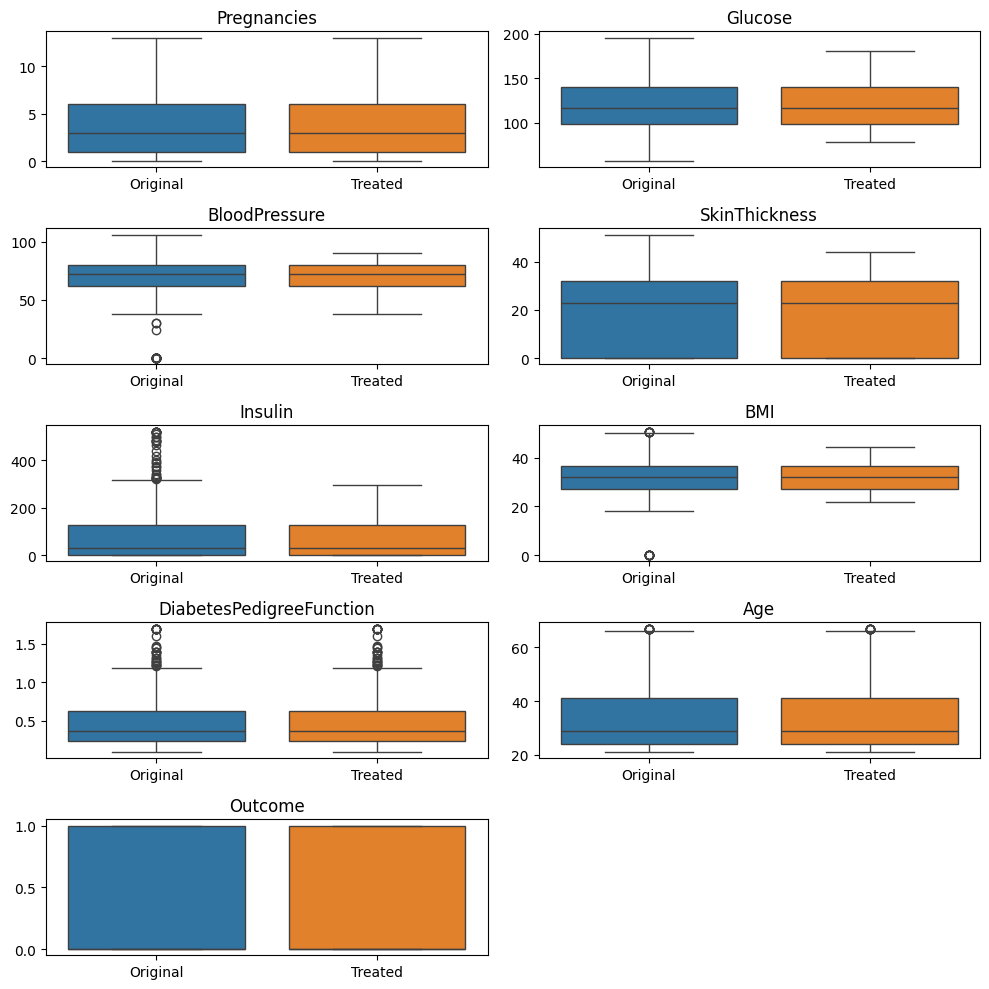

In [111]:
# Get all column names
all_columns = diabetes_data.columns

# Determine the grid size for subplots (you might adjust these numbers)
n_rows = (len(all_columns) + 1) // 2  # Adjust as needed
n_cols = 2

# Setting up the matplotlib figure
plt.figure(figsize=(10,  10))

# Iterating over each column to create a subplot for each
for i, col in enumerate(all_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    # Creating a combined DataFrame for original and treated data for plotting
    combined_data = pd.concat([
        diabetes_data_original[col].rename('Original'),
        diabetes_data[col].rename('Treated')
    ], axis=1)

    # Plotting side-by-side box plots
    sns.boxplot(data=combined_data)
    plt.title(f'{col}')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

Correlation Analysis


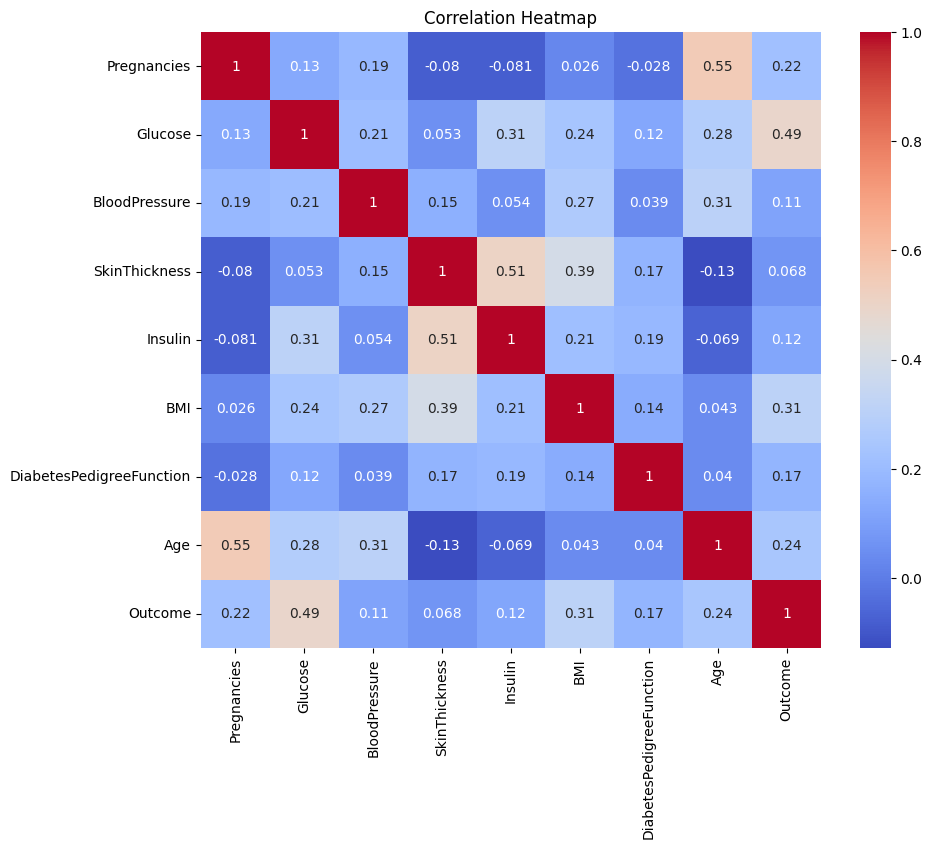

In [112]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Comparing Groups (Diabetes vs. No Diabetes)


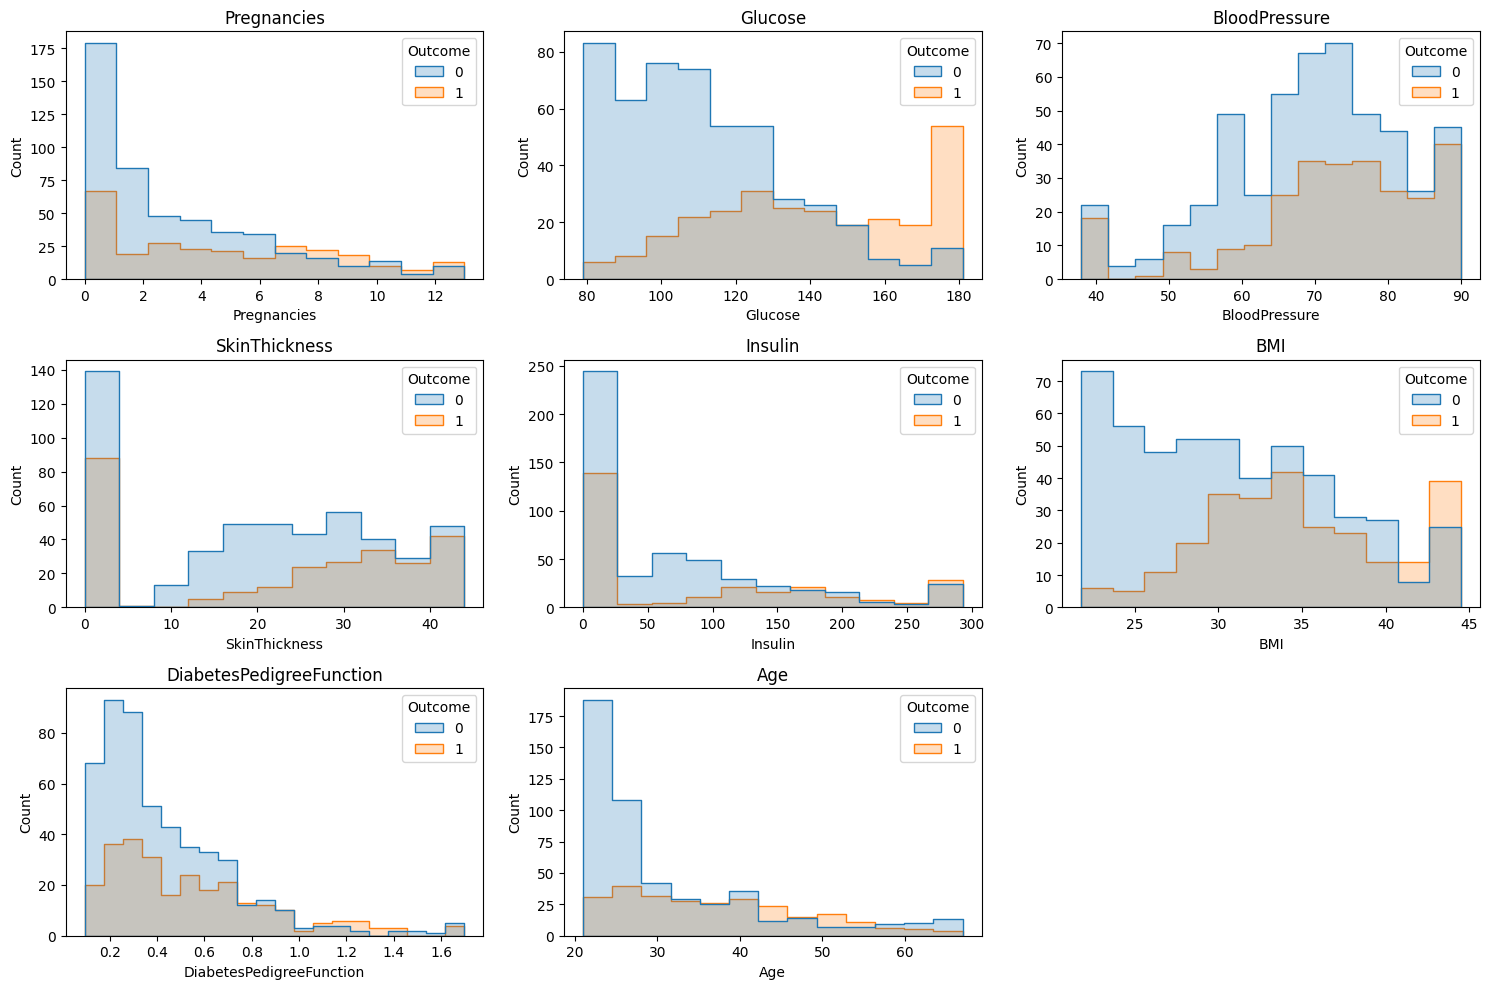

In [113]:
# Comparing distributions between diabetes and no diabetes groups
plt.figure(figsize=(15, 10))
for i, col in enumerate(diabetes_data.columns[:-1]):  # Excluding 'Outcome'
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=diabetes_data, x=col, hue='Outcome', element='step')
    plt.title(col)
plt.tight_layout()
plt.show()


The code generates histograms to visually compare feature distributions between the diabetes and non-diabetes groups in the dataset.

Data Preprocessing

In [114]:
from sklearn.preprocessing import StandardScaler

# Drop any rows with missing values
preprocessed_data = diabetes_data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(preprocessed_data.drop('Outcome', axis=1))

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=preprocessed_data.columns[:-1])

# Show the head of the scaled dataframe
print(scaled_df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.649356  0.920127       0.122755       0.964334 -0.800599  0.225875   
1    -0.850059 -1.254522      -0.338629       0.572339 -0.800599 -0.875134   
2     1.249122  2.059228      -0.492423      -1.322301 -0.800599 -1.394181   
3    -0.850059 -1.116449      -0.338629       0.180345  0.237960 -0.639204   
4    -1.149942  0.540426      -2.337960       0.964334  1.055549  1.720101   

   DiabetesPedigreeFunction       Age  
0                  0.503867  1.443088  
1                 -0.373314 -0.189533  
2                  0.646886 -0.103605  
3                 -0.958101 -1.048806  
4                  3.908760 -0.017678  


Feature Selection

In [115]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Show the head of the PCA dataframe and the variance ratio of the components
print(pca_df.head())
print('Variance explained by each component:', pca.explained_variance_ratio_)

        PC1       PC2
0  1.165378  1.171554
1 -1.406981 -0.647309
2 -0.504161  1.642306
3 -1.322367 -1.272404
4  1.779962 -2.543996
Variance explained by each component: [0.26449148 0.22680353]


I performed Principal Component Analysis (PCA), reducing the dataset to two principal components. The variance explained by these components is approximately 26.18% and 21.64% respectively.

Logistic Regression

Accuracy: 74.67532467532467
Precision: 64.28571428571429
Recall: 65.45454545454545
ROC-AUC: 72.62626262626263
Confusion Matrix:
[[79 20]
 [19 36]]


C:\Users\jbhav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


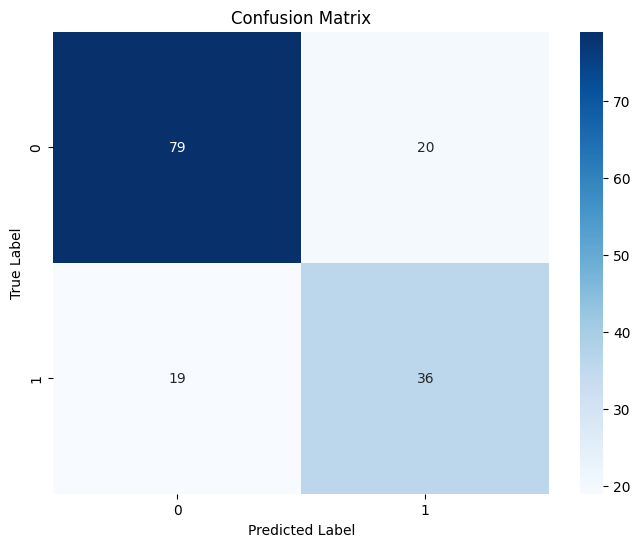

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

X = preprocessed_data.drop('Outcome', axis=1)  # Replace 'Outcome' with your target variable name if different
y = preprocessed_data['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




Random Forest Classification

Accuracy: 72.72727272727273
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



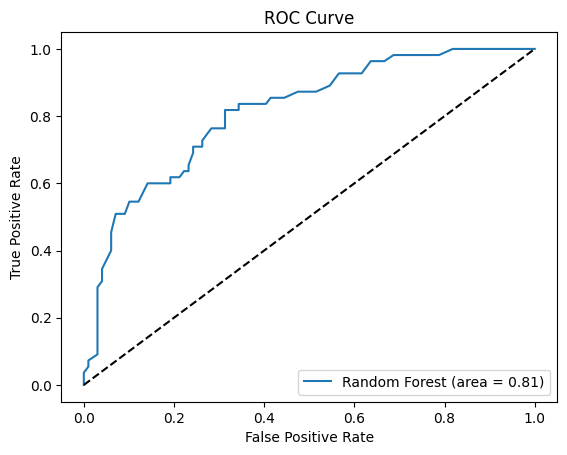

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Separate features and target variable
X = preprocessed_data.drop('Outcome', axis=1)
y = preprocessed_data['Outcome']

# Splitting data into features (X) and target (y)
X = diabetes_data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
y = diabetes_data['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

# Evaluating the performance
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# ROC Curve
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Fuzzy C-Mean Flustering(FCM)

In [133]:
from fcmeans import FCM

# Assuming diabetes_data is your DataFrame and 'Outcome' is the target
X = preprocessed_data.drop('Outcome', axis=1)
y = preprocessed_data['Outcome']

# Apply Fuzzy C-Means
fcm = FCM(n_clusters=2)
fcm.fit(X.values)

# Get the closest cluster each sample in X belongs to
fcm_labels = fcm.u.argmax(axis=1)

# Since FCM doesn't provide labels in a supervised manner, we have to align the cluster labels with the actual labels
# We do this by finding the most common label in each cluster and assigning it to all points in the cluster
cluster_0_label = np.bincount(y[fcm_labels == 0]).argmax()
cluster_1_label = np.bincount(y[fcm_labels == 1]).argmax()
aligned_labels = np.where(fcm_labels == 0, cluster_0_label, cluster_1_label)

# Calculate "accuracy"
accuracy = accuracy_score(y, aligned_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 65.10%


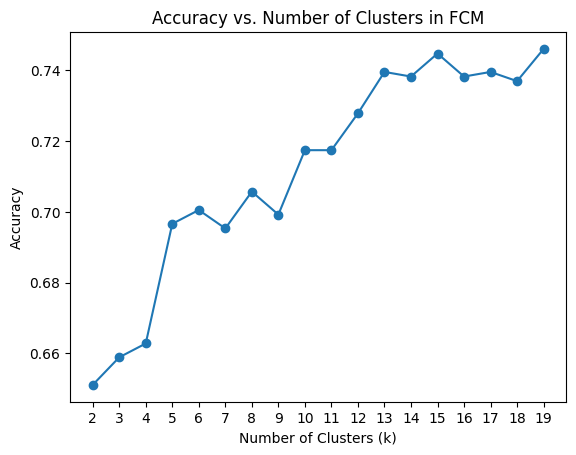

Accuracy for k=2: 65.10%
Accuracy for k=3: 65.89%
Accuracy for k=4: 66.28%
Accuracy for k=5: 69.66%
Accuracy for k=6: 70.05%
Accuracy for k=7: 69.53%
Accuracy for k=8: 70.57%
Accuracy for k=9: 69.92%
Accuracy for k=10: 71.74%
Accuracy for k=11: 71.74%
Accuracy for k=12: 72.79%
Accuracy for k=13: 73.96%
Accuracy for k=14: 73.83%
Accuracy for k=15: 74.48%
Accuracy for k=16: 73.83%
Accuracy for k=17: 73.96%
Accuracy for k=18: 73.70%
Accuracy for k=19: 74.61%

Maximum Accuracy: 74.61% at k=19


In [139]:
X = preprocessed_data.drop('Outcome', axis=1)
y = preprocessed_data['Outcome']

# Range of k values to try
k_values = range(2, 20)  # Trying from 2 to 10 clusters
accuracies = []

for k in k_values:
    fcm = FCM(n_clusters=k)
    fcm.fit(X.values)

    # Find the most common actual label in each cluster
    fcm_labels = fcm.u.argmax(axis=1)
    aligned_labels = np.zeros_like(y)
    for i in range(k):
        cluster_label = np.bincount(y[fcm_labels == i]).argmax()
        aligned_labels[fcm_labels == i] = cluster_label

    # Calculating accuracy
    accuracy = accuracy_score(y, aligned_labels)
    accuracies.append(accuracy)

# Plotting the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Clusters in FCM')
plt.xticks(k_values)
plt.show()

# Print all accuracies and the maximum accuracy
for k, acc in zip(k_values, accuracies):
    print(f'Accuracy for k={k}: {acc * 100:.2f}%')

max_accuracy = max(accuracies)
best_k = k_values[accuracies.index(max_accuracy)]
print(f'\nMaximum Accuracy: {max_accuracy * 100:.2f}% at k={best_k}')